Read the file

In [122]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('Data/used_cars_data.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [123]:
print('Shape of the data set rows {} columns {}'.format(df.shape[0],df.shape[1]))

Shape of the data set rows 7253 columns 14


Check for null and duplicate values

In [124]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

% of null values per column

In [125]:
#Each element of series will undergo operation (/ by total rows * 100)
df.isnull().sum()/df.shape[0]*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

Remove the S.No column  before checking for duplicate rows

In [126]:
df_1= df.drop(['S.No.'], axis=1)

In [127]:
df_1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [128]:
df_1.duplicated().sum()

1

In [129]:
df_1[df_1.duplicated()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


Remove the 1 duplicate row

In [130]:
df_1 =df_1.drop_duplicates()

In [131]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7206 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.2+ KB


Unique values for each feature

In [132]:
cols=df_1.columns
for i in cols:
    print('Number of unique values for feature {} is {}'.format(i, df[i].nunique()))

Number of unique values for feature Name is 2041
Number of unique values for feature Location is 11
Number of unique values for feature Year is 23
Number of unique values for feature Kilometers_Driven is 3660
Number of unique values for feature Fuel_Type is 5
Number of unique values for feature Transmission is 2
Number of unique values for feature Owner_Type is 4
Number of unique values for feature Mileage is 450
Number of unique values for feature Engine is 150
Number of unique values for feature Power is 386
Number of unique values for feature Seats is 9
Number of unique values for feature New_Price is 625
Number of unique values for feature Price is 1373


In [133]:
df_1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Name, Location, Fuel_Type, Transmission, Owner_Type are categorical data

In [134]:
df_1.describe()

,Year,Kilometers_Driven,Seats,Price
count,7252.000000,7.252000e+03,7199.000000,6019.000000
mean,2013.365830,5.869999e+04,5.279761,9.479468
std,3.254405,8.443351e+04,0.811709,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.342900e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Kilometers_Driven and Price seem to have outliers

In [135]:
# Look for distribution histogram for features

In [136]:
#sns.boxplot(data=df_imp, x='age')
##just having a look at the distribution of the age column
#plt.figure(figsize=(5,5))
#sns.histplot(df_imp['age'], color='tomato', label='BMI',kde=True)
#plt.legend()
#plt.grid()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


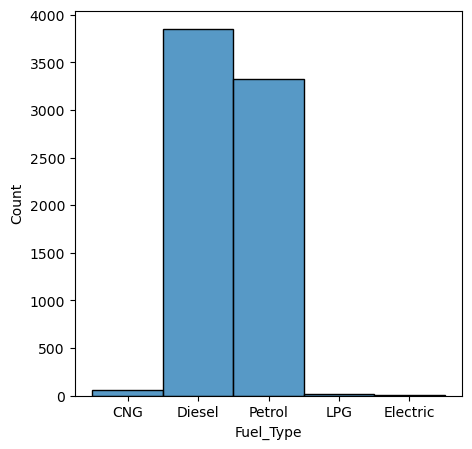

In [137]:
plt.figure(figsize=(5,5))
sns.histplot(df_1['Fuel_Type'])
plt.show()

Most of the cars are either Diesel or Petrol based, Then CNG. A very few cars are LPG , Electric based

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


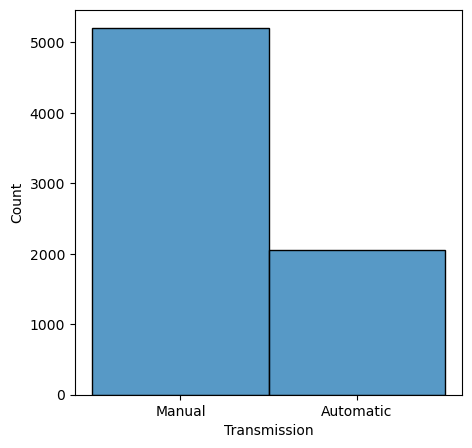

In [138]:
plt.figure(figsize=(5,5))
sns.histplot(df_1['Transmission'])
plt.show()

More Manual cars less Automatic cars

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Owner_Type
First             5951
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64


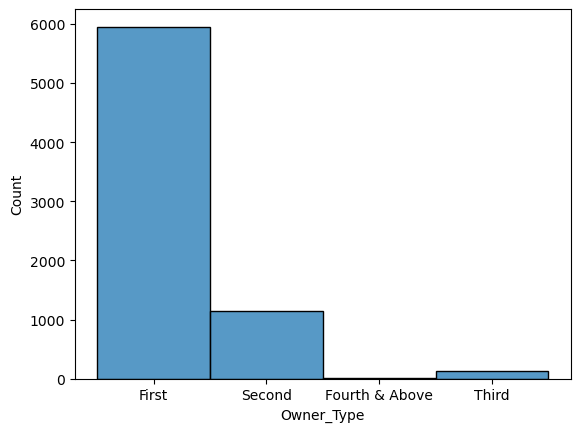

In [139]:
print(df_1['Owner_Type'].value_counts())
plt.figure('Owner_Type')
sns.histplot(df_1['Owner_Type'])
plt.show()

Majority of the owners are First and Second owner.

In [140]:
df_1.describe()

,Year,Kilometers_Driven,Seats,Price
count,7252.000000,7.252000e+03,7199.000000,6019.000000
mean,2013.365830,5.869999e+04,5.279761,9.479468
std,3.254405,8.443351e+04,0.811709,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.342900e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


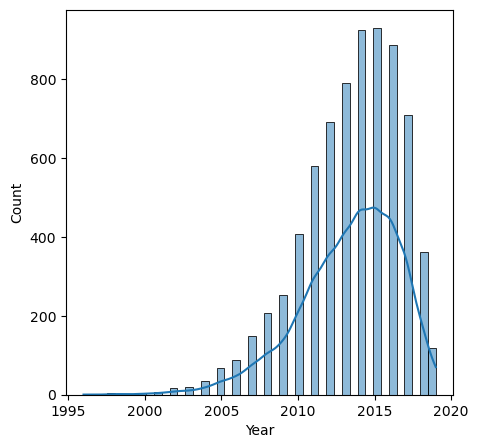

In [142]:
#Kilometers_Driven and Price seem to have outliers
plt.figure(figsize=(5,5))
sns.histplot(df_1['Year'], kde=True)
plt.show()

<Axes: >

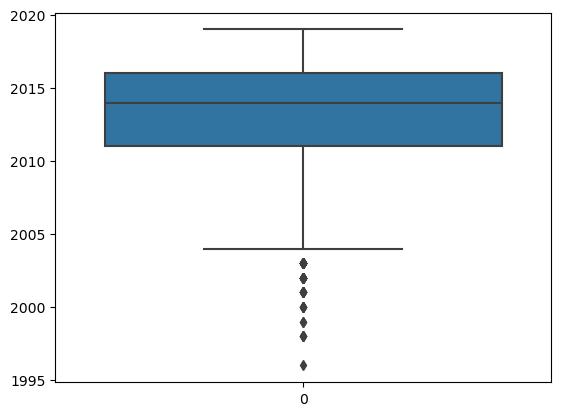

In [143]:
sns.boxplot(df_1['Year'])

In [146]:
# 2013.365830 + 1.5 * 3.254405 = 2018.2474375 , why the values more than 2018 are not considered outliers??

Year has outliers on lower end

In [ ]:
plt.figure